In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %inline matplotlib
import seaborn as sns

In [0]:
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### Basic exploration of the dataset

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [0]:
train_data.shape

(9557, 143)

In [0]:
train_data['Target'].unique()

array([4, 2, 3, 1], dtype=int64)

In [0]:
len(train_data['Id'].unique())

9552

#### Since the target column has 4 distinct values, it is a classification problem with 4 categories

In [0]:
train_data['Target'].count()

9557

In [0]:
train_data['v18q1'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

### Dropping columns having more than 30% null values

In [0]:
np.ceil(train_data['Target'].count()*0.3)

2868.0

In [0]:
train_data.dropna(axis = 1, thresh=np.ceil(train_data['Target'].count()*0.3), inplace = True)
train_data.shape

(9557, 140)

#### 3 columns were dropped

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 140 entries, Id to Target
dtypes: float64(5), int64(130), object(5)
memory usage: 10.2+ MB


In [0]:
for column in list(train_data.columns)[:-1]:
    print(column, train_data[column].count())

Id 9557
v2a1 2697
hacdor 9557
rooms 9557
hacapo 9557
v14a 9557
refrig 9557
v18q 9557
v18q1 2215
r4h1 9557
r4h2 9557
r4h3 9557
r4m1 9557
r4m2 9557
r4m3 9557
r4t1 9557
r4t2 9557
r4t3 9557
tamhog 9557
tamviv 9557
escolari 9557
rez_esc 1629
hhsize 9557
paredblolad 9557
paredzocalo 9557
paredpreb 9557
pareddes 9557
paredmad 9557
paredzinc 9557
paredfibras 9557
paredother 9557
pisomoscer 9557
pisocemento 9557
pisoother 9557
pisonatur 9557
pisonotiene 9557
pisomadera 9557
techozinc 9557
techoentrepiso 9557
techocane 9557
techootro 9557
cielorazo 9557
abastaguadentro 9557
abastaguafuera 9557
abastaguano 9557
public 9557
planpri 9557
noelec 9557
coopele 9557
sanitario1 9557
sanitario2 9557
sanitario3 9557
sanitario5 9557
sanitario6 9557
energcocinar1 9557
energcocinar2 9557
energcocinar3 9557
energcocinar4 9557
elimbasu1 9557
elimbasu2 9557
elimbasu3 9557
elimbasu4 9557
elimbasu5 9557
elimbasu6 9557
epared1 9557
epared2 9557
epared3 9557
etecho1 9557
etecho2 9557
etecho3 9557
eviv1 9557
eviv2 9

In [0]:
for column in list(train_data.columns)[:-1]:
    if(train_data[column].dtype in ['object']):
        print(column, train_data[column].count())
        print(column, train_data[column].unique())

Id 9557
Id ['ID_279628684' 'ID_f29eb3ddd' 'ID_68de51c94' ... 'ID_85fc658f8'
 'ID_ced540c61' 'ID_a38c64491']
idhogar 9557
idhogar ['21eb7fcc1' '0e5d7a658' '2c7317ea8' ... 'a8eeafc29' '212db6f6c'
 'd6c086aa3']
dependency 9557
dependency ['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
edjefe 9557
edjefe ['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
edjefa 9557
edjefa ['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


In [0]:
len(train_data['idhogar'].unique())

2985

#### As for the dataset, it has both numerical and categorical variables, but in number format with an exception of 5 columns(String datatype). Out of them 3 columns have been found to have inconsistencies. Because of these inconsistencies, the datatype of the whole column was changed. Replacing the inconsistent values can be done by using min and max of that particular column.

#### Why are we replacing instead of dropping - 'yes' could mean the maximum and 'no' could mean the min value from that column. These columns refer to education years of the male and female members of the family. The column description directs us to replace 'yes' by 1 amd 'no' by 0.

In [0]:
for column in ['edjefa', 'edjefe']:
    train_data[column][train_data[column]=='yes'] = 1
    train_data[column][train_data[column]=='no'] = 0

In [0]:
for column in ['edjefa', 'edjefe']:
    test_data[column][test_data[column]=='yes'] = 1
    test_data[column][test_data[column]=='no'] = 0

In [0]:
train_data['dependency'][train_data['dependency']=='yes'] = (train_data['hogar_nin']+train_data['hogar_mayor'])/(train_data['hogar_total']-(train_data['hogar_nin']+train_data['hogar_mayor']))

In [0]:
train_data['dependency'][train_data['dependency']=='no'] = (train_data['hogar_nin']+train_data['hogar_mayor'])/(train_data['hogar_total']-(train_data['hogar_nin']+train_data['hogar_mayor']))

In [0]:
test_data['dependency'][test_data['dependency']=='yes'] = (test_data['hogar_nin']+test_data['hogar_mayor'])/(test_data['hogar_total']-(test_data['hogar_nin']+test_data['hogar_mayor']))

In [0]:
test_data['dependency'][test_data['dependency']=='no'] = (test_data['hogar_nin']+test_data['hogar_mayor'])/(test_data['hogar_total']-(test_data['hogar_nin']+test_data['hogar_mayor']))

#### The inconsistent values were replaced accordingly (from directions in the column description)

In [0]:
for column in ['edjefa', 'edjefe', 'dependency']:
    if(train_data[column].dtype in ['object']):
        print(column, train_data[column].unique())

edjefa [0 '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19' 1
 '21' '12' '2' '20' '18']
edjefe ['10' '12' 0 '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 1 '3' '18' '13' '20']
dependency [0.0 '8' 1.0 '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5' '.40000001'
 '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25' '.22222222' '5'
 '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143' '1.75'
 '.71428573' '.16666667' '.60000002']


In [0]:
train_data['meaneduc'].count()

9552

In [0]:
train_data = train_data.dropna(inplace=False)

In [0]:
train_data.shape

(9552, 140)

### Whether the dataset is biased or not

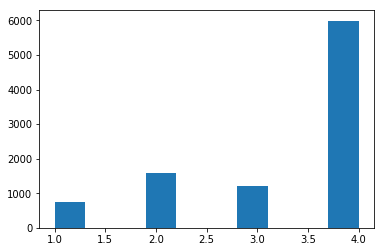

In [0]:
plt.figure()
plt.hist(train_data['Target'])
plt.show()

### The above is a histogram of values of the target variable

#### As we can see, the data is biased towards the poverty level-4. Therefore we can expect a highly biased output as well. Suitable ways to tackle this could be sample boosting(generating duplicates in order to balance the data distribuiton)

In [0]:
from scipy.stats import itemfreq

In [0]:
freq_target = itemfreq(train_data['Target'])
freq_target

array([[   1,  755],
       [   2, 1597],
       [   3, 1209],
       [   4, 5996]], dtype=int64)

### Proof of biasness of the data

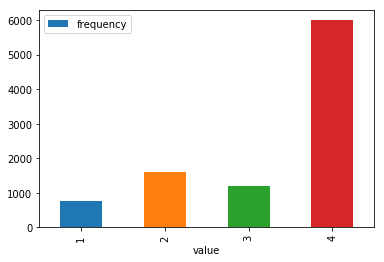

In [0]:
pd.DataFrame(freq_target, columns=['value', 'frequency']).plot(kind='bar', x='value', y='frequency')

### Whether all members of the house have the same poverty level

### If there is a house without a family head

In [0]:
train_data['parentesco1'].unique()

array([1, 0], dtype=int64)

In [0]:
freq_fam_head = itemfreq(train_data['parentesco1'])
freq_fam_head

array([[   0, 6582],
       [   1, 2970]], dtype=int64)

#### From this we can infer that there are 6582 houses without a family head.

### Feature Engineering

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
for column in ['edjefa', 'edjefe', 'dependency']:
    train_data[column] = pd.to_numeric(train_data[column])

In [0]:
scaler = MinMaxScaler()

for column in list(train_data.columns)[:-1]:
    if(train_data[column].dtype not in ['object']):
        train_data[column] = scaler.fit_transform(train_data[[column]])
train_data.head()

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0.0,0.2,0.0,1.0,1.0,0.0,0.0,0.125,0.125,...,0.226757,0.196514,0.000000,0.226757,0.000000,0.026087,0.000000,0.073046,0.196514,4
1,ID_f29eb3ddd,0.0,0.3,0.0,1.0,1.0,1.0,0.0,0.125,0.125,...,0.326531,0.477096,0.000000,0.326531,0.000000,0.026087,1.000000,0.105186,0.477096,4
2,ID_68de51c94,0.0,0.7,0.0,1.0,1.0,0.0,0.0,0.000,0.000,...,0.274376,0.899564,0.000000,0.000000,0.000000,0.005217,1.000000,0.088386,0.899564,4
3,ID_d671db89c,0.0,0.4,0.0,1.0,1.0,1.0,0.0,0.250,0.250,...,0.183673,0.030715,0.089286,0.274376,0.049383,0.047729,0.015625,0.088386,0.030715,4
4,ID_d56d6f5f5,0.0,0.4,0.0,1.0,1.0,1.0,0.0,0.250,0.250,...,0.274376,0.145499,0.089286,0.274376,0.049383,0.047729,0.015625,0.088386,0.145499,4


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
encoder = LabelEncoder()
train_data['idhogar'] = encoder.fit_transform(train_data[['idhogar']])

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(train_data.iloc[:, 1:-1], train_data.iloc[:, -1])
pca_data.shape

(9552, 5)

In [0]:
pca_data_test = pca.fit_transform(test_data.iloc[:, 1:-1], test_data.iloc[:, -1])
pca_data_test.shape

(23856, 5)

In [0]:
pca.explained_variance_ratio_

array([9.99986020e-01, 1.83777925e-06, 9.02436680e-07, 8.42180282e-07,
       7.30079412e-07])

### Training the model

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
random_forest = RandomForestClassifier()

In [0]:
random_forest.fit(pca_data, train_data.iloc[:, -1])

ValueError: Number of labels=9557 does not match number of samples=9552

In [0]:
for column in list(train_data.columns)[:-1]:
    if(test_data[column].dtype not in ['object']):
        test_data[column] = scaler.fit_transform(test_data[[column]])
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0.0,0.285714,0.0,1.0,1.0,0.0,NaN,0.166667,...,0.041237,0.000000,0.001700,0.047619,0.000000,0.01,0.013194,0.003906,0.210069,0.001700
1,ID_1c78846d2,NaN,0.0,0.285714,0.0,1.0,1.0,0.0,NaN,0.166667,...,0.422680,0.580499,0.178659,0.047619,0.000000,0.01,0.013194,0.003906,0.210069,0.178659
2,ID_e5442cf6a,NaN,0.0,0.285714,0.0,1.0,1.0,0.0,NaN,0.166667,...,0.422680,0.655329,0.178659,0.047619,0.000000,0.01,0.013194,0.003906,0.210069,0.178659
3,ID_a8db26a79,NaN,0.0,0.928571,0.0,1.0,1.0,1.0,1.0,0.000000,...,0.608247,0.580499,0.369965,0.000000,0.580499,0.00,0.005797,0.000000,0.197531,0.369965
4,ID_a62966799,175000.0,0.0,0.214286,0.0,1.0,1.0,1.0,1.0,0.000000,...,0.185567,0.274376,0.034435,0.000000,0.000000,0.01,0.001359,1.000000,NaN,0.034435


In [0]:
test_data.dropna(axis = 1, thresh=np.ceil(train_data['Target'].count()*0.3), inplace = True)
test_data.shape

(23856, 142)

In [0]:
train_data.columns

Index(['Id', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1',
       'r4h2', 'r4h3',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=140)

In [0]:
train_data['rez_esc']

In [0]:
test_data.drop(columns=['v2a1', 'v18q1', 'rez_esc'], inplace=True)

In [0]:
test_data['idhogar'] = encoder.fit_transform(test_data[['idhogar']])

In [0]:
random_forest.score(pca_data_test, test_data.iloc[:, -1])

0.011653252850435948

In [0]:
for column in list(test_data.columns):
    if(test_data[column].dtype not in ['object']):
        test_data[column].fillna(test_data[column].median(), inplace=True)